In [5]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cata Dataset from Kaggle

In [6]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

 97% 786M/812M [00:04<00:00, 182MB/s]
100% 812M/812M [00:04<00:00, 181MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extract")

The dataset is extract


In [9]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The test dataset is extracted")

The test dataset is extracted


In [10]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The train dataset is extract")

The train dataset is extract


In [11]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images:", file_count)

Number of images: 25000


Printing the name of images

In [12]:
file_names = os.listdir('/content/train')
print(file_names[:100])

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg', 'dog.5162.jpg', 'dog.11697.jpg', 'dog.2446.jpg', 'cat.1615.jpg', 'dog.5418.jpg', 'dog.11166.jpg', 'dog.1858.jpg', 'dog.2048.jpg', 'dog.718.jpg', 'cat.10126.jpg', 'dog.5436.jpg', 'cat.8467.jpg', 'dog.10817.jpg', 'dog.11059.jpg', 'cat.12404.jpg', 'dog.10163.jpg', 'dog.4148.jpg', 'cat.9389.jpg', 'dog.11925.jpg', 'cat.5405.jpg', 'dog.6716.jpg', 'cat.4459.jpg', 'cat.9556.jpg', 'dog.5287.jpg', 'dog.9849.jpg', 'cat.8613.jpg', 'cat.3119.jpg', 'cat.9399.jpg', 'dog.8444.jpg', 'dog.11619.jpg', 'cat.2005.jpg', 'dog.9055.jpg', 'dog.4561.jpg', 'cat.6019.jpg', 'cat.9775.jpg', 'dog.11946.jpg', 'dog.680.jpg', 'dog.12268.jpg', 'dog.2526.jpg', 'cat.5158.jpg', 'dog.6405.jpg', 'dog.4498.jpg', 'dog.3523.jpg', 'dog.10831.jpg', 'dog.6067.jpg', 'dog.5329.jpg', 'dog.7413.jpg', 'dog.494.jpg', 'cat.3171.jpg', 'cat.2073.jpg', 'dog.1859.jpg', 'dog.9927.jpg', 'cat.3300.jpg', 'cat.6654.jpg', 'cat.7472.jpg', 'cat.8071.jpg', 'dog.3081.jp

Importing the dependencies 

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of dogs and cats

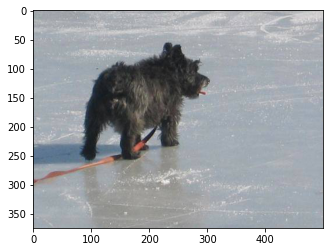

In [14]:
# display dog image
img = mpimg.imread('/content/train/dog.10085.jpg')
img_plot = plt.imshow(img)
plt.show()

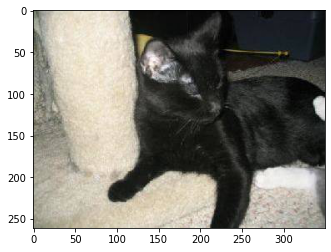

In [15]:
# display cat image
img = mpimg.imread('/content/train/cat.4249.jpg')
img_plot = plt.imshow(img)
plt.show()

In [16]:
file_names = os.listdir('/content/train')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
dog
dog
cat
dog


In [17]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Number of dog images: ", dog_count)
print("Number of cat images: ", cat_count)

Number of dog images:  12500
Number of cat images:  12500


Resizing all the images 

In [18]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [19]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

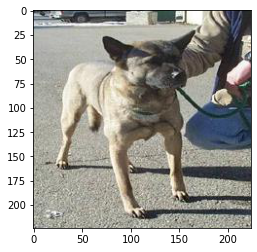

In [21]:
# display resize dog image
img = mpimg.imread('/content/image resized/dog.9949.jpg')
img_plot = plt.imshow(img)
plt.show()

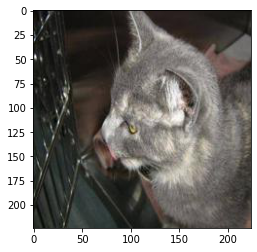

In [22]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.1506.jpg')
img_plot = plt.imshow(img)
plt.show()

Creating labels for resized image of dogs and cats

Cat --> 0

Dog --> 1

In [23]:
# creating a for loop to assign labels
filenames = os.listdir("/content/image resized/")

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == "dog":
    labels.append(1)
  
  else:
    labels.append(0)


In [24]:
print(filenames[0:5])
print(len(filenames))

['dog.10919.jpg', 'dog.11251.jpg', 'dog.9949.jpg', 'cat.1506.jpg', 'dog.7432.jpg']
2000


In [25]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [26]:
print(labels.count(1))
print(labels.count(0))

1004
996


In [27]:
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [ 996 1004]


Converting all the resized images to numpy arrays

In [28]:
import cv2
import glob

In [29]:
image_directory ='/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory+"*."+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [31]:
dog_cat_images

array([[[[  3,   0,  15],
         [  3,   0,  15],
         [  1,   0,  16],
         ...,
         [ 41,  45,  50],
         [ 41,  45,  50],
         [ 41,  45,  50]],

        [[  3,   0,  15],
         [  3,   0,  15],
         [  1,   0,  16],
         ...,
         [ 42,  46,  51],
         [ 41,  45,  50],
         [ 41,  45,  50]],

        [[  2,   2,  16],
         [  2,   2,  16],
         [  2,   1,  17],
         ...,
         [ 42,  46,  51],
         [ 42,  46,  51],
         [ 41,  45,  50]],

        ...,

        [[179, 154, 134],
         [178, 153, 133],
         [176, 151, 131],
         ...,
         [155, 120,  94],
         [159, 120,  92],
         [164, 125,  97]],

        [[175, 150, 130],
         [179, 154, 134],
         [178, 153, 133],
         ...,
         [149, 114,  88],
         [150, 111,  83],
         [158, 119,  91]],

        [[170, 145, 125],
         [176, 151, 131],
         [176, 151, 131],
         ...,
         [156, 121,  95],
        

In [32]:
type(dog_cat_images)

numpy.ndarray

In [33]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [34]:
x = dog_cat_images
y = np.asarray(labels)

**Train Test Split**

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [37]:
x_test

array([[[[ 92, 116, 122],
         [122, 146, 152],
         [153, 176, 184],
         ...,
         [153, 179, 195],
         [119, 142, 157],
         [ 17,  40,  55]],

        [[145, 171, 177],
         [156, 182, 188],
         [162, 188, 194],
         ...,
         [154, 180, 196],
         [120, 143, 158],
         [ 19,  42,  57]],

        [[163, 194, 197],
         [158, 189, 192],
         [150, 179, 183],
         ...,
         [154, 180, 196],
         [122, 145, 161],
         [ 22,  45,  61]],

        ...,

        [[132, 137, 136],
         [131, 136, 135],
         [134, 139, 138],
         ...,
         [217, 217, 217],
         [214, 214, 214],
         [212, 212, 212]],

        [[132, 138, 137],
         [131, 137, 136],
         [133, 139, 138],
         ...,
         [215, 215, 215],
         [208, 208, 208],
         [205, 205, 205]],

        [[135, 141, 140],
         [133, 139, 138],
         [135, 141, 140],
         ...,
         [215, 215, 215],
        

In [38]:
#scalling the data
x_train_scaled = x_train/255

x_test_scaled = x_test/255

In [39]:
print(x_train_scaled)

[[[[0.82352941 0.79215686 0.81960784]
   [0.80392157 0.77254902 0.8       ]
   [0.78039216 0.74901961 0.77647059]
   ...
   [0.75686275 0.76862745 0.78823529]
   [0.77254902 0.78431373 0.80392157]
   [0.78823529 0.8        0.81960784]]

  [[0.82745098 0.79607843 0.82352941]
   [0.81176471 0.78039216 0.80784314]
   [0.79607843 0.76470588 0.79215686]
   ...
   [0.76470588 0.77647059 0.79607843]
   [0.78039216 0.79215686 0.81176471]
   [0.79607843 0.80784314 0.82745098]]

  [[0.82745098 0.79607843 0.82352941]
   [0.82352941 0.79215686 0.81960784]
   [0.81568627 0.78431373 0.81176471]
   ...
   [0.77254902 0.78431373 0.80392157]
   [0.78823529 0.8        0.81960784]
   [0.80392157 0.81568627 0.83529412]]

  ...

  [[0.74509804 0.75686275 0.77647059]
   [0.7254902  0.7372549  0.75686275]
   [0.72941176 0.74117647 0.76078431]
   ...
   [0.67843137 0.74117647 0.79215686]
   [0.6745098  0.7372549  0.78823529]
   [0.68627451 0.74901961 0.8       ]]

  [[0.74509804 0.75686275 0.77647059]
   [0.7

**Building the Neural Network**

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [42]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [43]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [44]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 39s 704ms/step - loss: 0.2405 - acc: 0.9031
Epoch 2/5
50/50 [==============================] - 33s 669ms/step - loss: 0.0750 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 35s 692ms/step - loss: 0.0544 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 34s 676ms/step - loss: 0.0428 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 34s 684ms/step - loss: 0.0353 - acc: 0.9919


In [45]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', round(acc*100, 2))

13/13 [==============================] - 9s 634ms/step - loss: 0.0316 - acc: 0.9875
Test Loss = 0.03156472370028496
Test Accuracy = 98.75


Predicting model 

Path of the image to be predicted: /content/cat.jpg


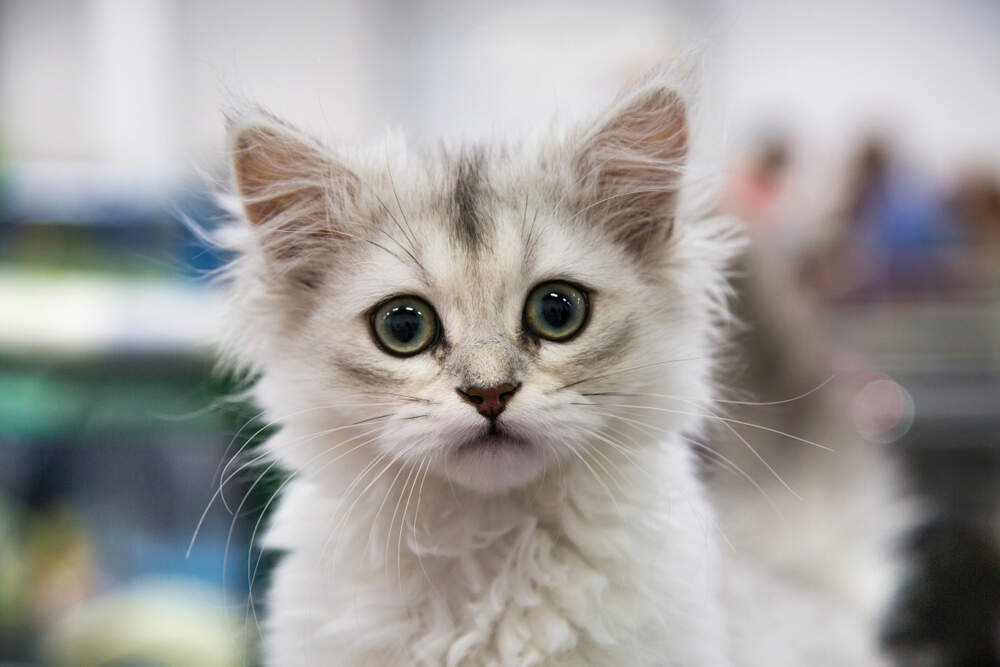

1/1 [==============================] - 0s 404ms/step
[[ 3.6591806 -3.907909 ]]
0
The image represents a Cat


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


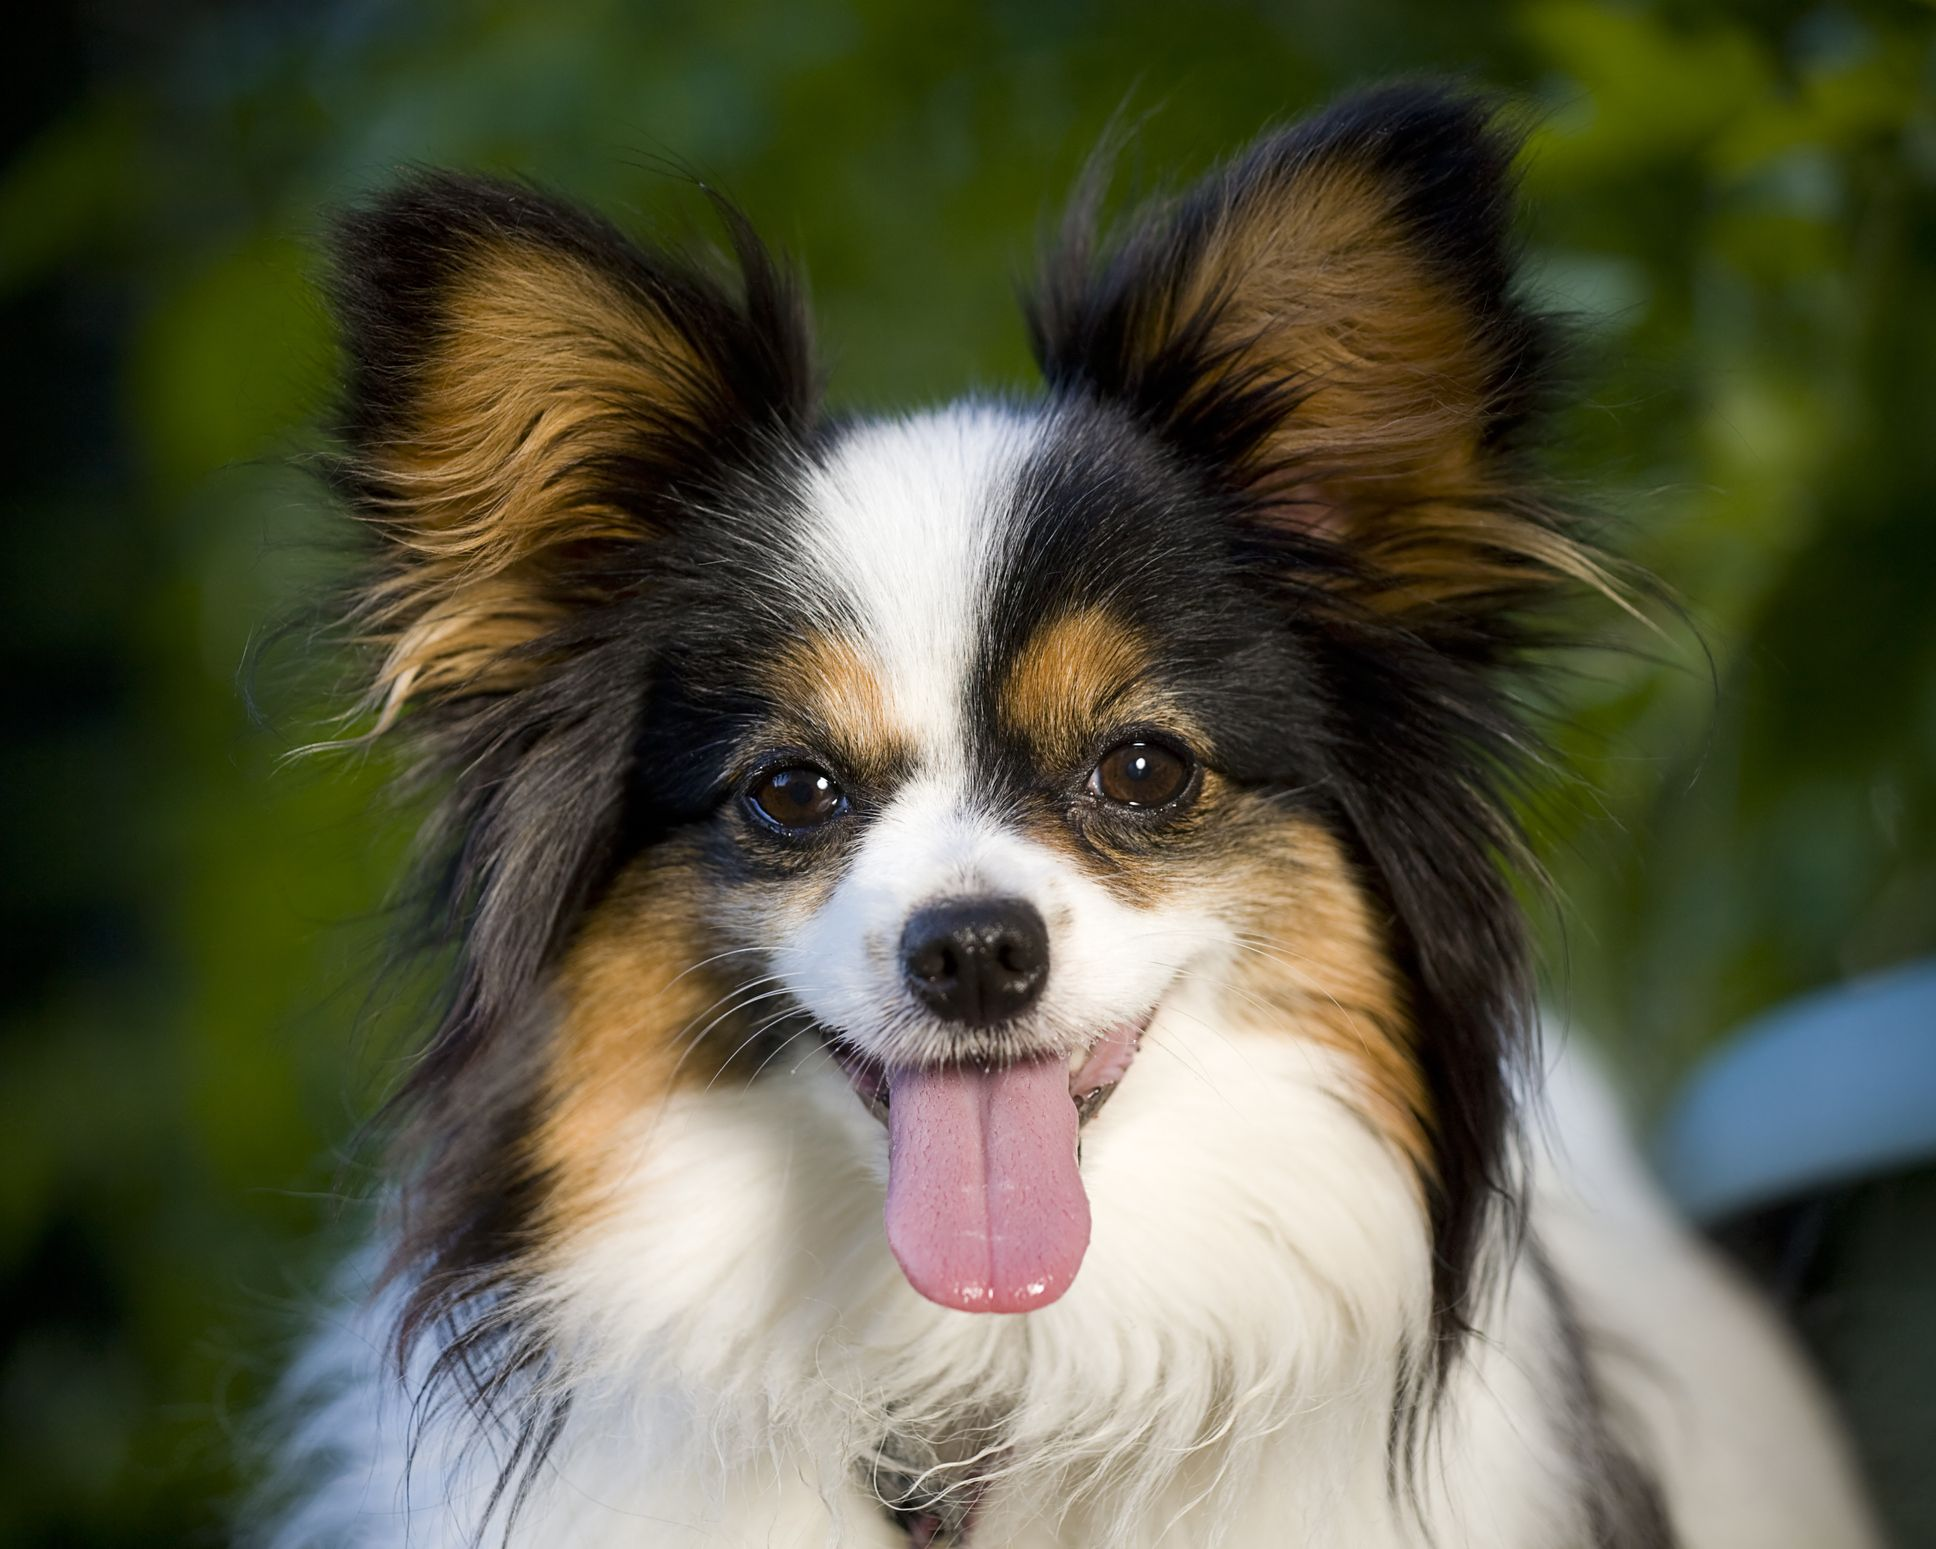

1/1 [==============================] - 0s 55ms/step
[[-0.6582072   0.97313017]]
1
The image represents a Dog


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')